<a href="https://colab.research.google.com/github/Micmil38/Telco-Customer-Churn/blob/master/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Download neccessary dependencies to start analysis.
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pylab import rcParams
!pip install heatmapz
from heatmap import heatmap, corrplot

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/Micmil38/Telco-Customer-Churn/master/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [ ]:
df.head(15)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [ ]:
df.shape

(7043, 21)

In [ ]:
df.isnull().values.any()
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
#drop customerID column since there is no use for it
df.drop(['customerID'], axis=1, inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [ ]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [ ]:
df.duplicated

<bound method DataFrame.duplicated of       gender  SeniorCitizen Partner  ... MonthlyCharges  TotalCharges Churn
0     Female              0     Yes  ...          29.85         29.85    No
1       Male              0      No  ...          56.95       1889.50    No
2       Male              0      No  ...          53.85        108.15   Yes
3       Male              0      No  ...          42.30       1840.75    No
4     Female              0      No  ...          70.70        151.65   Yes
...      ...            ...     ...  ...            ...           ...   ...
7038    Male              0     Yes  ...          84.80       1990.50    No
7039  Female              0     Yes  ...         103.20       7362.90    No
7040  Female              0     Yes  ...          29.60        346.45    No
7041    Male              1     Yes  ...          74.40        306.60   Yes
7042    Male              0      No  ...         105.65       6844.50    No

[7043 rows x 20 columns]>

In [ ]:
df.duplicated().sum()

22

In [ ]:
# examine duplicated rows
df.loc[df.duplicated(), :]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
964,Male,0,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,45.70,45.70,Yes
1338,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
1491,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.55,19.55,No
1739,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.90,69.90,Yes
1932,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.20,20.20,No
2713,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.45,20.45,No
2892,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.45,20.45,No
3301,Female,1,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.60,69.60,Yes
3754,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.05,20.05,No
4098,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.20,20.20,Yes


In [ ]:
# dropping duplicate values 
df.drop_duplicates(keep='first',inplace=True) 
df.duplicated().sum()

0

In [ ]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [ ]:
null_columns = df.columns[df.isnull().any()]
df[null_columns].isnull().sum()


TotalCharges    11
dtype: int64

In [ ]:
#average monthly charge
#df_monthly_charges = df.loc[df["MonthlyCharges"], ["MonthlyCharges"]]
#df_monthly_charges.mean()

In [ ]:
df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.groupby(['gender'])['Churn'].value_counts(normalize=True)

gender  Churn
Female  No       0.731609
        Yes      0.268391
Male    No       0.739339
        Yes      0.260661
Name: Churn, dtype: float64

26.83% females churned while 26.07% males churned

> Indented block



In [ ]:
df.groupby(['InternetService','MultipleLines'])['Churn'].value_counts(normalize=True)

InternetService  MultipleLines     Churn
DSL              No                No       0.795411
                                   Yes      0.204589
                 No phone service  No       0.750733
                                   Yes      0.249267
                 Yes               No       0.894356
                                   Yes      0.105644
Fiber optic      No                No       0.545139
                                   Yes      0.454861
                 Yes               No       0.604231
                                   Yes      0.395769
No               No                No       0.915385
                                   Yes      0.084615
                 Yes               No       0.970760
                                   Yes      0.029240
Name: Churn, dtype: float64

20.6% customers with 1 line and DSL service churned.

10.56% customers with multiple lines and DSL service churned.

45.77% customers with 1 line and fiber optic service churned.

39.58% customers with multiple lines and fiber optic service churned.

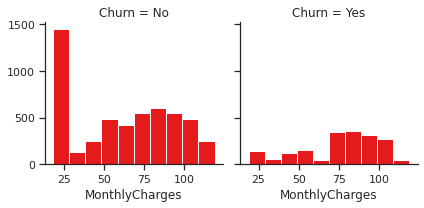

In [ ]:
g = sns.FacetGrid(df, col = 'Churn')
g.map(plt.hist, 'MonthlyCharges')
plt.show()

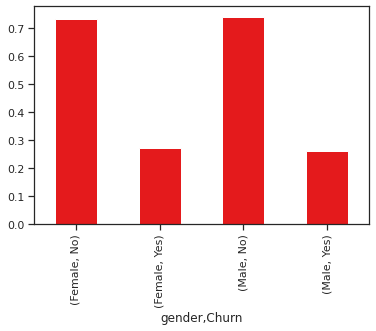

In [ ]:
df_1 = df.groupby(['gender'])['Churn'].value_counts(normalize=True)
df_1.plot.bar()

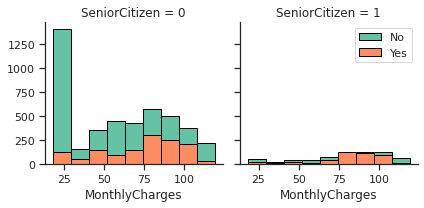

In [ ]:
#Plot churn based on if customers are senior citizens or not
bins = np.linspace(df.MonthlyCharges.min(), df.MonthlyCharges.max(), 10)
g = sns.FacetGrid(df, col="SeniorCitizen", hue="Churn", palette="Set2", col_wrap=2)
g.map(plt.hist, 'MonthlyCharges', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

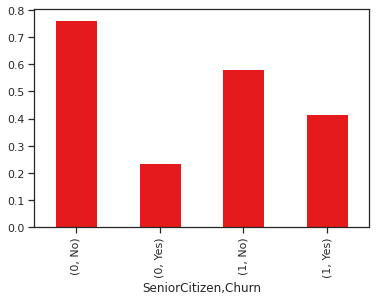

In [ ]:
df_2 = df.groupby(['SeniorCitizen'])['Churn'].value_counts(normalize=True)
df_2.plot.bar()

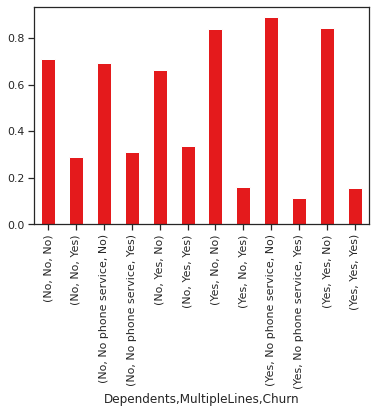

In [ ]:
df_3 =df.groupby(['Dependents','MultipleLines'])['Churn'].value_counts(normalize=True)
df_3.plot.bar()

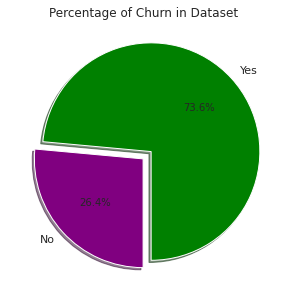

In [ ]:
sizes = df['Churn'].value_counts(sort = True)
colors = ["green","purple"] 
labels = 'Yes','No'
explode = (0.1, 0) 
rcParams['figure.figsize'] = 5,5
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Percentage of Churn in Dataset')
plt.show()

In [ ]:
grouping_1 = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
            'PhoneService', 'MultipleLines', 'InternetService',
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
            'TechSupport','StreamingTV','StreamingMovies',
            'Contract', 'PaperlessBilling','PaymentMethod']

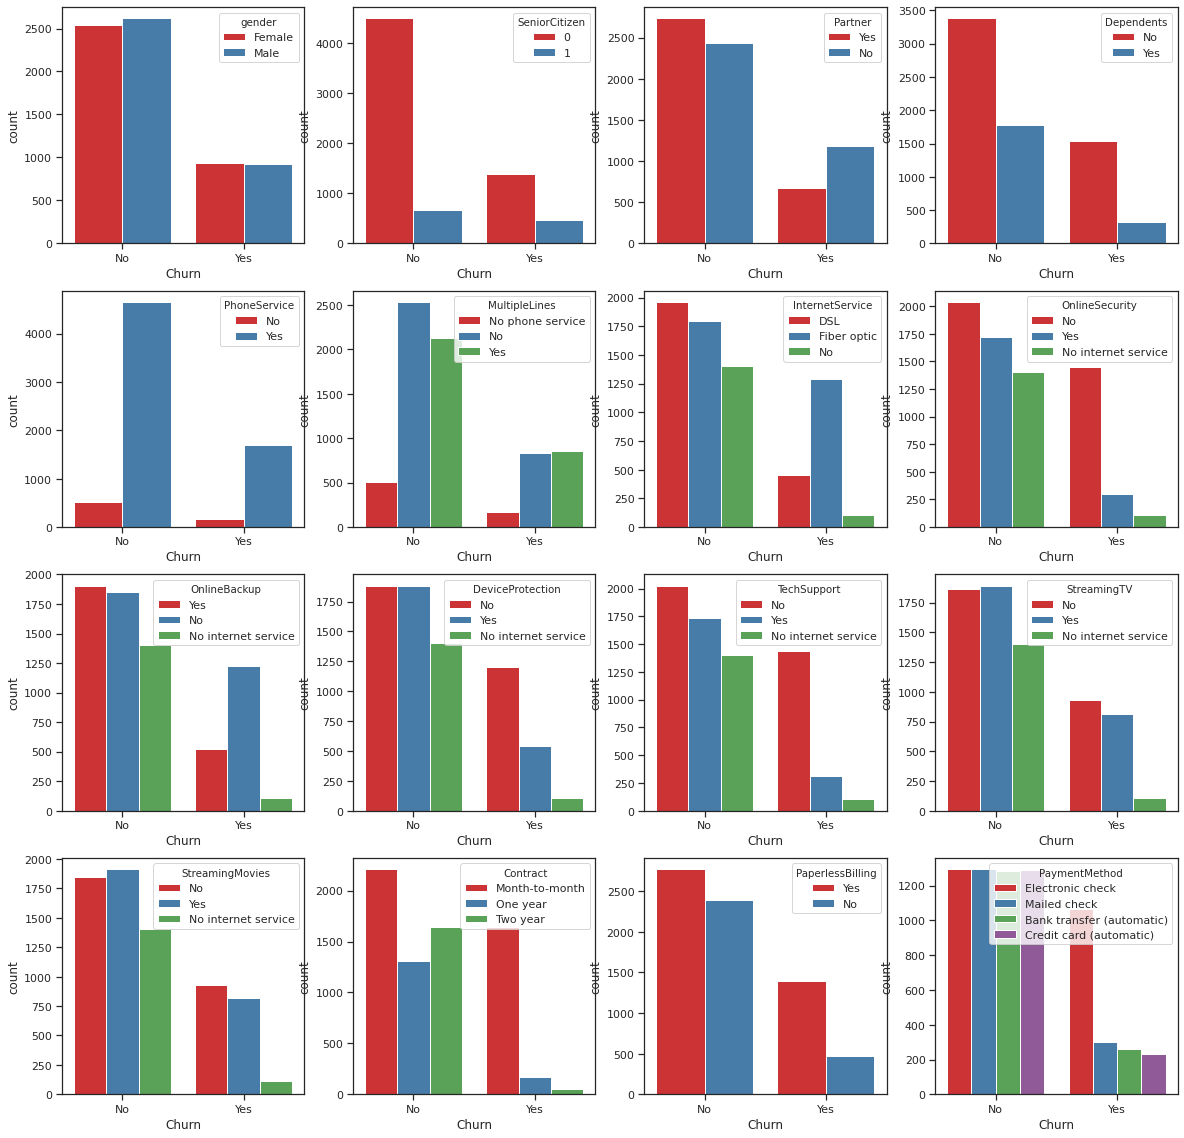

In [ ]:
fig , ax = plt.subplots(4,4,figsize=(20,20))
sns.set(style="ticks", color_codes=True, palette = 'Set1')
for axis,col in zip(ax.flat,grouping_1):
    sns.countplot(x=df["Churn"],hue=df[col],ax=axis)

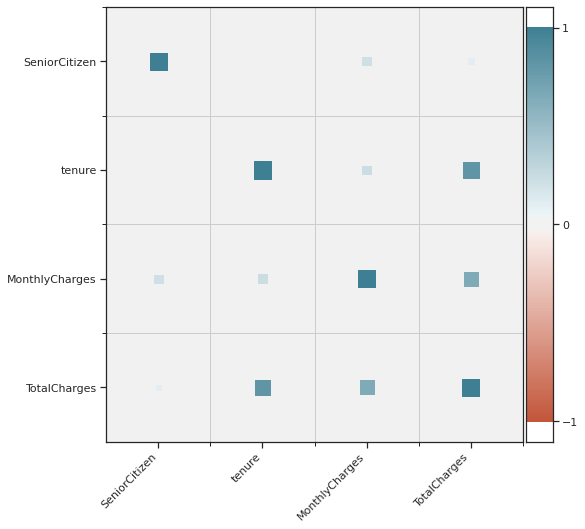

In [ ]:
plt.figure(figsize=(8, 8))
corrplot(df.corr(), size_scale=300);

#Preprocessing and build model




In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7021 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   object 
 1   SeniorCitizen     7021 non-null   int64  
 2   Partner           7021 non-null   object 
 3   Dependents        7021 non-null   object 
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   object 
 6   MultipleLines     7021 non-null   object 
 7   InternetService   7021 non-null   object 
 8   OnlineSecurity    7021 non-null   object 
 9   OnlineBackup      7021 non-null   object 
 10  DeviceProtection  7021 non-null   object 
 11  TechSupport       7021 non-null   object 
 12  StreamingTV       7021 non-null   object 
 13  StreamingMovies   7021 non-null   object 
 14  Contract          7021 non-null   object 
 15  PaperlessBilling  7021 non-null   object 
 16  PaymentMethod     7021 non-null   object 


In [ ]:
#replace Yes and No to 1 and 0
df['Churn'] = df['Churn'].replace({'No': 0 , 'Yes': 1})

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [ ]:
#Convert variables with object type to numerical
df_dummies = pd.get_dummies(data = df, columns = ['gender', 'Partner', 'Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod'])

In [ ]:
df_dummies.head(20)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
5,0,8,99.65,820.50,1,1,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0
6,0,22,89.10,1949.40,0,0,1,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0
7,0,10,29.75,301.90,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1
8,0,28,104.80,3046.05,1,1,0,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0
9,0,62,56.15,3487.95,0,0,1,1,0,0,1,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0


In [ ]:
df_dummies.dtypes

SeniorCitizen                                int64
tenure                                       int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
gender_Female                                uint8
gender_Male                                  uint8
Partner_No                                   uint8
Partner_Yes                                  uint8
Dependents_No                                uint8
Dependents_Yes                               uint8
PhoneService_No                              uint8
PhoneService_Yes                             uint8
MultipleLines_No                             uint8
MultipleLines_No phone service               uint8
MultipleLines_Yes                            uint8
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No                           uint8
OnlineSecurity_No              

In [ ]:
#Check for missing values
df_dummies.isna().sum()

SeniorCitizen                               0
tenure                                      0
MonthlyCharges                              0
TotalCharges                               11
Churn                                       0
gender_Female                               0
gender_Male                                 0
Partner_No                                  0
Partner_Yes                                 0
Dependents_No                               0
Dependents_Yes                              0
PhoneService_No                             0
PhoneService_Yes                            0
MultipleLines_No                            0
MultipleLines_No phone service              0
MultipleLines_Yes                           0
InternetService_DSL                         0
InternetService_Fiber optic                 0
InternetService_No                          0
OnlineSecurity_No                           0
OnlineSecurity_No internet service          0
OnlineSecurity_Yes                

In [ ]:
#Replace missing values with 0
df_dummies['TotalCharges'].fillna(0.00,inplace=True)

In [ ]:
df_dummies.shape

(7021, 46)

In [ ]:
# drop recurring features 
df_dummies = df_dummies.drop(columns=['OnlineSecurity_No internet service', 'OnlineBackup_No internet service', 
                        'DeviceProtection_No internet service', 'TechSupport_No internet service', 
                        'StreamingTV_No internet service', 'StreamingMovies_No internet service'], axis=1)

# Churn Prediction

In [ ]:
y = df_dummies.Churn
X = df_dummies.drop('Churn', axis=1)

In [ ]:
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [ ]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (5616, 39) (5616,)
Test set: (1405, 39) (1405,)


In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import itertools
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [ ]:
log_reg = LogisticRegression()

In [ ]:
result = log_reg.fit(X_train, y_train)

In [ ]:
prediction_test = log_reg.predict(X_test)
print(prediction_test)
print (classification_report(y_test, prediction_test))

[0 0 0 ... 0 1 1]
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1035
           1       0.63      0.54      0.58       370

    accuracy                           0.80      1405
   macro avg       0.74      0.71      0.72      1405
weighted avg       0.79      0.80      0.79      1405



In [ ]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, log_reg.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test,prediction_test))

Train set Accuracy:  0.8060897435897436
Test set Accuracy:  0.7957295373665481


In [ ]:
# Relationship of variables on predicted values
weights = pd.Series(log_reg.coef_[0],
 index=X.columns.values)
weights.sort_values(ascending = False)
#postive weights indicates higher probability of customer churning

Contract_Month-to-month                    0.419311
InternetService_Fiber optic                0.293755
SeniorCitizen                              0.272915
OnlineSecurity_No                          0.266606
TechSupport_No                             0.266076
PaymentMethod_Electronic check             0.249349
StreamingTV_Yes                            0.147711
OnlineBackup_No                            0.139836
StreamingMovies_Yes                        0.090641
DeviceProtection_No                        0.078262
MultipleLines_No phone service             0.052875
PhoneService_No                            0.052875
MonthlyCharges                             0.006743
TotalCharges                               0.000291
PaperlessBilling_Yes                      -0.005841
Dependents_No                             -0.038275
DeviceProtection_Yes                      -0.050382
tenure                                    -0.058368
StreamingMovies_No                        -0.062761
MultipleLine

In [ ]:
#Confusion Matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[199 171]
 [116 919]]


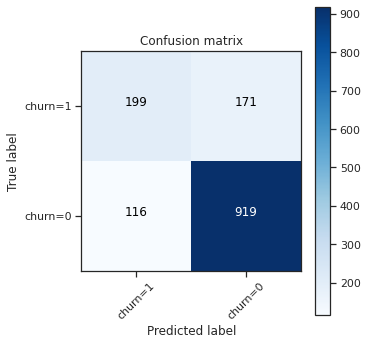

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, prediction_test, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [ ]:
#K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#K=1
knn_1 = KNeighborsClassifier(n_neighbors = 1)
knn_1.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [ ]:
predict1 = knn_1.predict(X_test)
print (classification_report(y_test, predict1))
print("Train set Accuracy: ", metrics.accuracy_score(y_train, knn_1.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, predict1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1035
           1       0.99      0.99      0.99       370

    accuracy                           1.00      1405
   macro avg       1.00      1.00      1.00      1405
weighted avg       1.00      1.00      1.00      1405

Train set Accuracy:  0.9975071225071225
Test set Accuracy:  0.9971530249110321


In [ ]:
#K=15
knn_15 = KNeighborsClassifier(n_neighbors = 15)
knn_15.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [ ]:
predict2 = knn_15.predict(X_test)
print (classification_report(y_test, predict2))
print("Train set Accuracy: ", metrics.accuracy_score(y_train, knn_15.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, predict2))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1035
           1       0.69      0.43      0.53       370

    accuracy                           0.80      1405
   macro avg       0.75      0.68      0.70      1405
weighted avg       0.78      0.80      0.78      1405

Train set Accuracy:  0.8089387464387464
Test set Accuracy:  0.797864768683274


In [ ]:
neighbors = list(range(1,26))
score = []
for i in neighbors: 
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    preds_neighbors = clf.predict(X_test)
    score.append(accuracy_score(y_test, preds_neighbors))

In [ ]:
score

[0.7174377224199289,
 0.7672597864768683,
 0.7544483985765125,
 0.7672597864768683,
 0.7580071174377224,
 0.7779359430604982,
 0.7736654804270463,
 0.7772241992882563,
 0.7750889679715303,
 0.7822064056939502,
 0.7800711743772242,
 0.7814946619217081,
 0.7800711743772242,
 0.7772241992882563,
 0.7715302491103203,
 0.7722419928825622,
 0.7786476868327402,
 0.7807829181494662,
 0.7793594306049823,
 0.7779359430604982,
 0.7772241992882563,
 0.7758007117437722,
 0.7772241992882563,
 0.7743772241992882,
 0.7800711743772242]

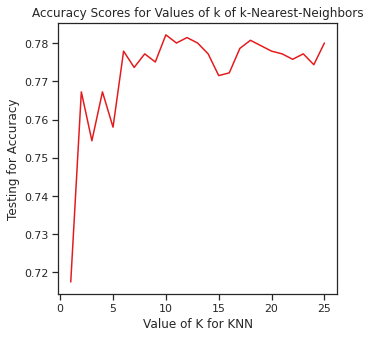

The best accuracy was with 0.7822064056939502 with k= 9


In [ ]:
plt.plot(neighbors, score)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing for Accuracy')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()
max_value = np.max(score)
max_index = score.index(max_value)
print( "The best accuracy was with", max_value, "with k=", max_index)